In [1]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Connect to SQLite database
conn = sqlite3.connect("sales_data.db")
cursor = conn.cursor()


In [2]:
cursor.execute('''
CREATE TABLE IF NOT EXISTS sales (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    product TEXT,
    quantity INTEGER,
    price REAL
)
''')
conn.commit()


In [3]:
def add_sale(product, quantity, price):
    cursor.execute(
        "INSERT INTO sales (product, quantity, price) VALUES (?, ?, ?)",
        (product, quantity, price)
    )
    conn.commit()
    print(f"Added sale: {product}, Quantity: {quantity}, Price: {price}")


In [4]:
def view_summary():
    query = """
    SELECT 
        product, 
        SUM(quantity) AS total_quantity, 
        SUM(quantity * price) AS total_revenue
    FROM sales
    GROUP BY product
    """
    df = pd.read_sql_query(query, conn)
    print("Sales Summary:")
    display(df)  # Jupyter-friendly display
    return df


In [5]:
def plot_revenue(df):
    df.plot(kind='bar', x='product', y='total_revenue', legend=False, color='skyblue')
    plt.title("Revenue per Product")
    plt.xlabel("Product")
    plt.ylabel("Revenue")
    plt.tight_layout()
    plt.show()


In [6]:
sample_data = [
    ('Apple', 10, 0.5),
    ('Banana', 20, 0.2),
    ('Orange', 15, 0.3)
]

cursor.execute("SELECT COUNT(*) FROM sales")
if cursor.fetchone()[0] == 0:
    cursor.executemany("INSERT INTO sales (product, quantity, price) VALUES (?, ?, ?)", sample_data)
    conn.commit()


Added sale: Grapes, Quantity: 12, Price: 0.4
Added sale: Apple, Quantity: 8, Price: 0.5
Sales Summary:


,product,total_quantity,total_revenue
0,Apple,23,11.5
1,Banana,30,6.0
2,Grapes,12,4.8
3,Orange,15,4.5


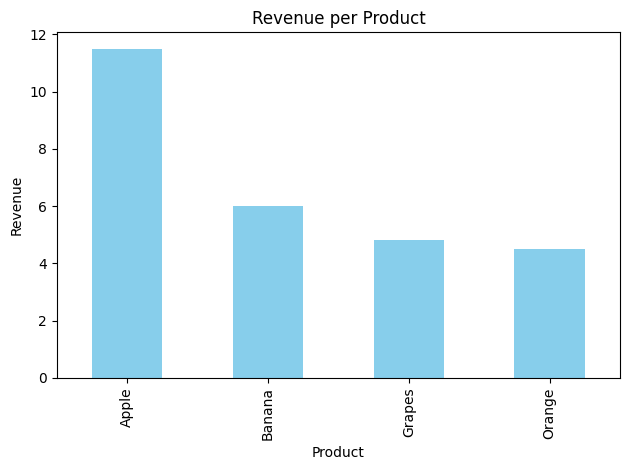

In [7]:
# Add a new sale
add_sale("Grapes", 12, 0.4)
add_sale("Apple", 8, 0.5)

# View summary
df = view_summary()

# Plot revenue chart
plot_revenue(df)


In [8]:
conn.close()
